# Model Definition and Evaluation
## Table of Contents
1. [Model Selection](#model-selection)
2. [Feature Engineering](#feature-engineering)
3. [Hyperparameter Tuning](#hyperparameter-tuning)
4. [Implementation](#implementation)
5. [Evaluation Metrics](#evaluation-metrics)
6. [Comparative Analysis](#comparative-analysis)


In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from tensorflow.keras import Input, Model, layers, optimizers, callbacks



## Model Selection

[Further development of the good base model.]


## Feature Engineering

[The three sector features are combined into a single vector, with ‘age’ kept separate. 
Various experiments failed to improve the model: Normalization via StandardScaler, LayerNormalization, GELU activation functions, different learning rates and numbers of epochs, and various dropout configurations.]

In [ ]:
# Load the data for Germany
df = pd.read_csv("../1_DatasetCharacteristics/data germany/ger_total.csv")
df_sh = pd.read_csv("../1_DatasetCharacteristics/data sh/sh_total.csv")

df_sh_original = df_sh.copy()

# Normalize delta values
max_delta = max(df['delta'].max(), df_sh['delta'].max())
df['delta'] = df['delta'] / max_delta
df_sh['delta'] = df_sh['delta'] / max_delta

max_age = max(df['age'].max(), df_sh['age'].max())
min_age = min(df['age'].min(), df_sh['age'].min())
df['age'] = (df['age'] - min_age) / (max_age - min_age)
df_sh['age'] = (df_sh['age'] - min_age) / (max_age - min_age)

key_col = df.columns[0]


## Hyperparameter Tuning

[No hyperparameter tuning methods.]


In [3]:
# Implement hyperparameter tuning
# Example using GridSearchCV with a DecisionTreeClassifier
# param_grid = {'max_depth': [2, 4, 6, 8]}
# grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
# grid_search.fit(X_train, y_train)


## Implementation

[This is the final model.]


In [ ]:
# Features and labels
X = df[['1. Sector', '2. Sector', '3. Sector', 'age']]
y = df['delta']

# Train/Test-Split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#   Input: 
#    - sectors_input: all sectors as one vector
#    - age_input:   the age
sectors_in = Input(shape=(3,), name='sectors_input')
age_in     = Input(shape=(1,), name='age_input')

x = sectors_in

x = layers.Concatenate(name='concat_sectors_age')([x, age_in])

x = layers.Dense(32, activation='relu')(x)
x = layers.LayerNormalization()(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(32, activation='relu')(x)
x = layers.LayerNormalization()(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(32, activation='relu')(x)
x = layers.LayerNormalization()(x)
x = layers.Dropout(0.1)(x)

# Output Layer 
output = layers.Dense(1, name='delta_output')(x)

# Model Definition
model = Model(inputs=[sectors_in, age_in], outputs=output, name='sector_age_regressor')

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# EarlyStopping-Callback
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# Train
history = model.fit(
    x=[ x_train[['1. Sector','2. Sector','3. Sector']].values,
         x_train[['age']].values ],
    y=y_train.values,
    validation_split=0.2,
    epochs=300,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluation 
test_results = model.evaluate(
    [ x_test[['1. Sector','2. Sector','3. Sector']].values,
      x_test[['age']].values ],
    y_test.values,
    verbose=1
)
print(f"Test Loss (MSE): {test_results[0]:.4f}, Test MAE: {test_results[1]:.4f}")

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.7333 - mae: 0.6754 - val_loss: 0.2053 - val_mae: 0.4217
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3597 - mae: 0.4883 - val_loss: 0.0730 - val_mae: 0.2415
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2922 - mae: 0.4286 - val_loss: 0.0419 - val_mae: 0.1445
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2998 - mae: 0.4215 - val_loss: 0.0555 - val_mae: 0.1621
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2554 - mae: 0.4046 - val_loss: 0.0314 - val_mae: 0.1268
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2893 - mae: 0.4109 - val_loss: 0.0311 - val_mae: 0.1353
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2043 - mae: 0.3611 - val_loss: 0.0336 - val_mae: 0.1443
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2347 - mae: 0.3714 - val_loss: 0.0350 - val_mae: 0.1510
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2455 - mae:

## Evaluation Metrics

[Use of MSE Loss and MAE, because these metrics make sense for the problem.]


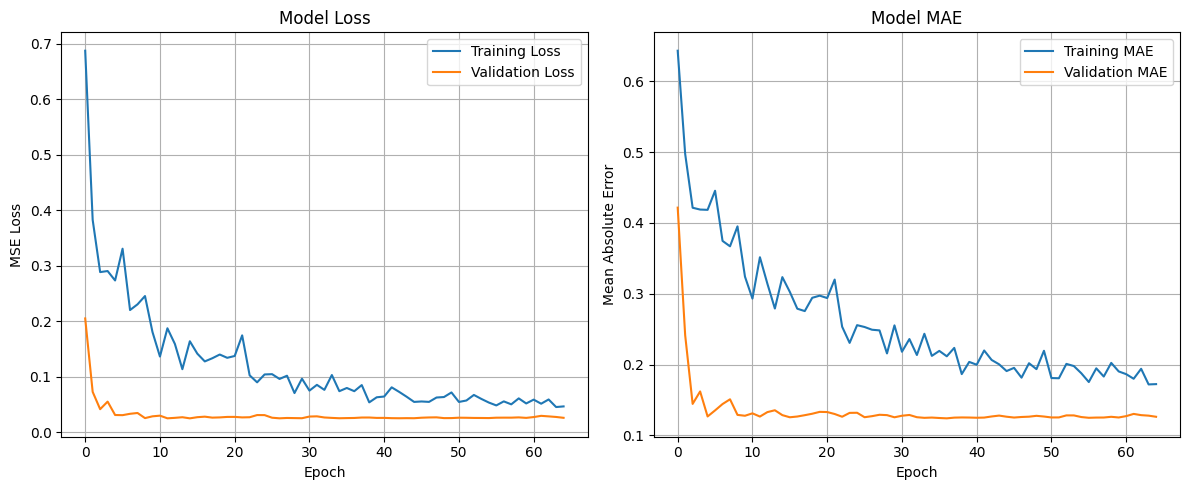

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0114 - mae: 0.0822
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


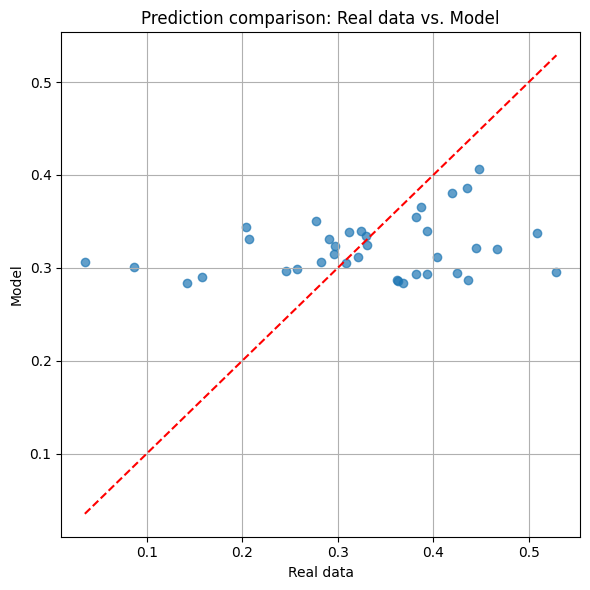

Final Validation Loss: 0.0263
Final Validation MAE:  0.1263
Final Training Loss: 0.0469
Final Training MAE:  0.1724


In [ ]:
# Plot learning curves (Loss & MAE)
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_mae = model.evaluate(
    [
        x_test[['1. Sector', '2. Sector', '3. Sector']].values,
        x_test[['age']].values
    ],
    y_test.values,
    verbose=1
)
test_loss, test_mae

# Predictions on the test dataset
y_pred = model.predict(
    [
        x_test[['1. Sector', '2. Sector', '3. Sector']].values,
        x_test[['age']].values
    ]
).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Real data')
plt.ylabel('Model')
plt.title('Prediction comparison: Real data vs. Model')
plt.grid(True)
plt.tight_layout()
plt.show()


val_loss = history.history['val_loss'][-1]
val_mae  = history.history['val_mae'][-1]

print(f"Final Validation Loss: {val_loss:.4f}")
print(f"Final Validation MAE:  {val_mae:.4f}")

train_loss = history.history['loss'][-1]
train_mae  = history.history['mae'][-1]

print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Training MAE:  {train_mae:.4f}")




## Comparative Analysis

[As can be seen in the presentation, the base model is better than the supposedly improved model presented here.]

In [2]:
# Comparative Analysis code (if applicable)
# Example: comparing accuracy of the baseline model and the new model

baseline_accuracy = 0.0184

new_model_accuracy = 0.0289

print(f"Baseline Model Accuracy (Validation, MSE Loss): {baseline_accuracy}, New Model Accuracy: {new_model_accuracy}")


Baseline Model Accuracy (Validation, MSE Loss): 0.0184, New Model Accuracy: 0.0289


## Export of the difference between the historical and the expected development

[Export to csv for further research.]

In [1]:
# Export the difference between the historical and the expected development
# Prepare the new data for prediction
x_new = df_sh[['1. Sector', '2. Sector', '3. Sector', 'age']]
y_new = df_sh['delta']

y_new_pred = model.predict([
    x_new[['1. Sector', '2. Sector', '3. Sector']].values,
    x_new[['age']].values
]).flatten()

# Create a DataFrame for the output
df_sh_out = pd.DataFrame({
    '1. Sector': x_new['1. Sector'],
    '2. Sector': x_new['2. Sector'],
    '3. Sector': x_new['3. Sector'],
    'age': df_sh_original['age'],
    'year_of_census': df_sh['year_of_census'],
    'delta_real': y_new,
    'delta_pred': y_new_pred
})

# export to CSV
df_sh_out.to_csv('sh_output.csv', index=False) 


NameError: name 'df_sh' is not defined